### Problem 1

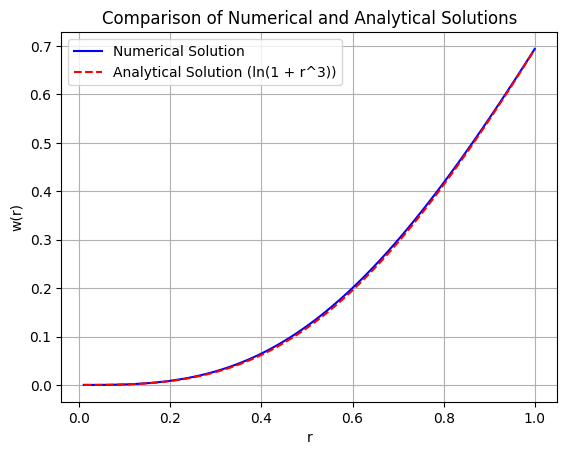

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the parameters
r_min = 0.01  # start from a small positive value to avoid division by zero
r_max = 1.0
N = 100  # number of grid points
dr = (r_max - r_min) / (N - 1)
r = np.linspace(r_min, r_max, N)

# Boundary conditions
w0 = 0  # w(0)
w_prime_0 = 0  # w'(0)
w_double_prime_0 = 0  # w''(0)

# Initial guess for w
w_initial_guess = np.zeros(N)

# Define the Emden-Fowler equation using finite differences
def emden_fowler_ode(w):
    # Define the residual array
    residual = np.zeros(N)
    
    # Boundary conditions
    residual[0] = w[0] - w0
    residual[1] = (w[1] - w[0]) / dr - w_prime_0
    residual[2] = (w[2] - 2 * w[1] + w[0]) / (dr**2) - w_double_prime_0

    # Apply the finite difference scheme for the rest of the points
    for i in range(3, N):
        w_triple_prime = (w[i] - 3 * w[i - 1] + 3 * w[i - 2] - w[i - 3]) / (dr**3)
        w_double_prime = (w[i] - 2 * w[i - 1] + w[i - 2]) / (dr**2)
        w_prime = (w[i] - w[i - 1]) / dr
        rhs = 6 * (r[i]**6 + 2 * r[i]**3 + 10) * np.exp(-3 * w[i])
        
        # Residual for the differential equation
        residual[i] = w_triple_prime + (6 / r[i]) * w_double_prime + (6 / r[i]**2) * w_prime - rhs

    return residual

# Solve the nonlinear system of equations using fsolve
numerical_solution = fsolve(emden_fowler_ode, w_initial_guess)

# Analytical solution: w(r) = ln(1 + r^3)
analytical_solution = np.log(1 + r**3)

# Plot the numerical and analytical solutions
plt.plot(r, numerical_solution, label="Numerical Solution", color="blue")
plt.plot(r, analytical_solution, label="Analytical Solution (ln(1 + r^3))", color="red", linestyle="--")
plt.xlabel("r")
plt.ylabel("w(r)")
plt.title("Comparison of Numerical and Analytical Solutions")
plt.legend()
plt.grid(True)
plt.show()


### Problem 2

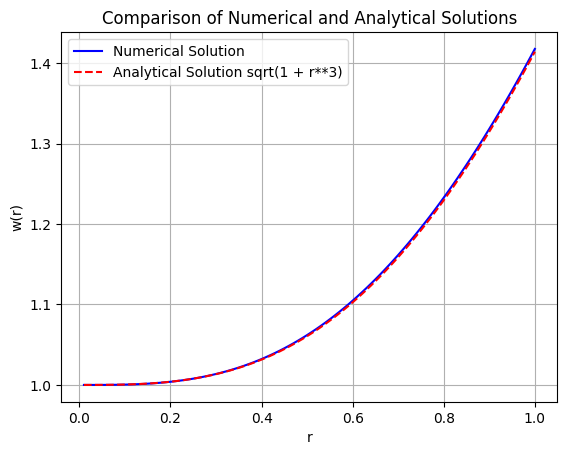

In [5]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the parameters
r_min = 0.01  # start from a small positive value to avoid division by zero
r_max = 1.0
N = 100  # number of grid points
dr = (r_max - r_min) / (N - 1)
r = np.linspace(r_min, r_max, N)

# Boundary conditions
w0 = 1  # w(0)
w_prime_0 = 0  # w'(0)
w_double_prime_0 = 0  # w''(0)

# Initial guess for w
w_initial_guess = np.zeros(N) + w0  # Initialize with w0 to maintain boundary conditions

# Define the Emden-Fowler equation using finite differences
def emden_fowler_ode(w):
    # Define the residual array
    residual = np.zeros(N)
    
    # Boundary conditions
    residual[0] = w[0] - w0
    residual[1] = (w[1] - w[0]) / dr - w_prime_0
    residual[2] = (w[2] - 2 * w[1] + w[0]) / (dr**2) - w_double_prime_0

    # Apply the finite difference scheme for the rest of the points
    for i in range(3, N):
        # Finite difference approximations
        w_triple_prime = (w[i] - 3 * w[i - 1] + 3 * w[i - 2] - w[i - 3]) / (dr**3)
        w_double_prime = (w[i] - 2 * w[i - 1] + w[i - 2]) / (dr**2)
        rhs = (9/8) * (r[i]**6 + 8) * (w[i]**-5)
        
        # Residual for the differential equation
        residual[i] = w_triple_prime + (2 / r[i]) * w_double_prime - rhs

    return residual

# Solve the nonlinear system of equations using fsolve
numerical_solution = fsolve(emden_fowler_ode, w_initial_guess)

# Analytical solution: w(r) = sqrt(1 + r**3)
analytical_solution = np.sqrt(1 + r**3)

# Plot the numerical and analytical solutions
plt.plot(r, numerical_solution, label="Numerical Solution", color="blue")
plt.plot(r, analytical_solution, label="Analytical Solution sqrt(1 + r**3)", color="red", linestyle="--")
plt.xlabel("r")
plt.ylabel("w(r)")
plt.title("Comparison of Numerical and Analytical Solutions")
plt.legend()
plt.grid(True)
plt.show()


### Problem 3

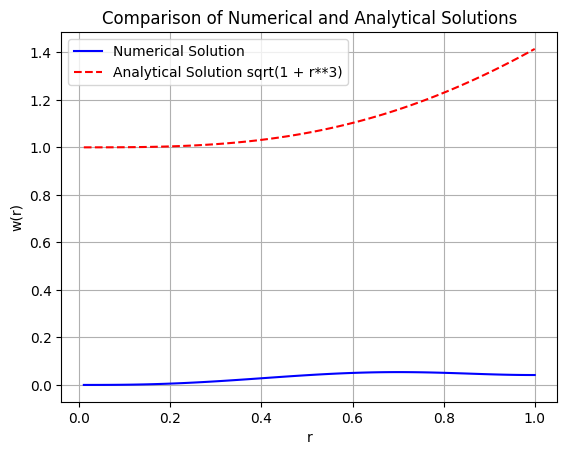

In [21]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Define the parameters
r_min = 0.01  # start from a small positive value to avoid division by zero
r_max = 1.0
N = 100  # number of grid points
dr = (r_max - r_min) / (N - 1)
r = np.linspace(r_min, r_max, N)

# Boundary conditions
w0 = 0  # w(0)
w_prime_0 = 0  # w'(0)

# Initial guess for w
w_initial_guess = np.zeros(N) + w0  # Initialize with w0 to maintain boundary conditions

# Define the Emden-Fowler equation using finite differences
def emden_fowler_ode(w):
    # Define the residual array
    residual = np.zeros(N)
    
    # Boundary conditions at r = 0
    residual[0] = w[0] - w0
    residual[1] = (w[1] - w[0]) / dr - w_prime_0
    
    # Apply the finite difference scheme for the rest of the points
    for i in range(2, N - 1):
        # Finite difference approximations
        w_triple_prime = (w[i + 1] - 3 * w[i] + 3 * w[i - 1] - w[i - 2]) / (dr**3)
        w_double_prime = (w[i + 1] - 2 * w[i] + w[i - 1]) / (dr**2)
        rhs = (w[i]**3) - (r[i]**9) * np.exp(3 * r[i]) + 7 * (r[i]**2) * np.exp(r[i]) + 6 * r[i] * np.exp(r[i]) - 6 * np.exp(r[i])
        
        # Residual for the differential equation
        residual[i] = w_triple_prime - (2 / r[i]) * w_double_prime - rhs

    # Boundary condition at r = 1 for w'(1) = 0
    residual[-1] = (w[-1] - w[-2]) / dr  # w'(1) = 0 condition

    return residual

# Solve the nonlinear system of equations using fsolve
numerical_solution = fsolve(emden_fowler_ode, w_initial_guess)

# Analytical solution: w(r) = sqrt(1 + r**3)
analytical_solution = np.sqrt(1 + r**3)

# Plot the numerical and analytical solutions
plt.plot(r, numerical_solution, label="Numerical Solution", color="blue")
plt.plot(r, analytical_solution, label="Analytical Solution sqrt(1 + r**3)", color="red", linestyle="--")
plt.xlabel("r")
plt.ylabel("w(r)")
plt.title("Comparison of Numerical and Analytical Solutions")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\SANDEEP KUMAR\AppData\Local\Temp\ipykernel_17684\1890138643.py:15: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-*" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(r_values, exact_solution_values, 'r-*', markersize=8, linewidth=1.5, label='Analytic',linestyle="--")  # Red line with star markers for Exact Solution


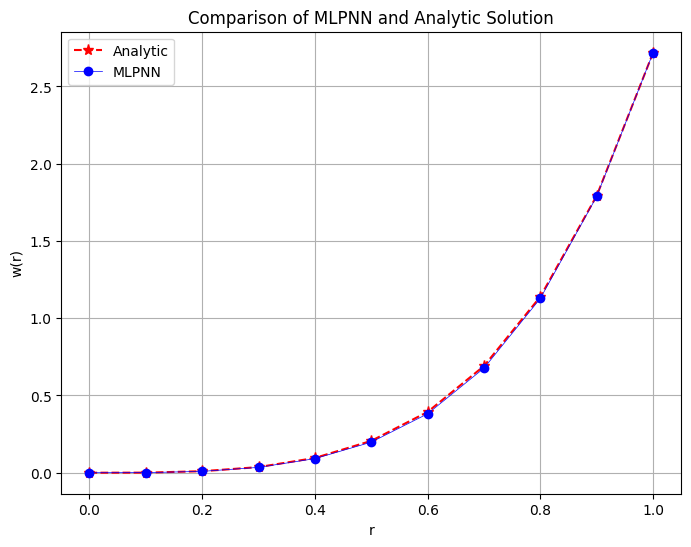